# Análise de dados de PIB per capita

[GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados no link acima. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Importando o dataset e fazendo a verificação dos dados.

In [3]:
df_gdp = pd.read_csv("GDP.csv", decimal=".")
display(df_gdp)
df_gdp.info()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


- Realizando a limpeza dos dados, aplico uma função para aplicar um split e retornar apenas o último elemento da lista (Ano), e faço a conversão para um número inteiro. 

In [4]:
df_gdp['Year'] = df_gdp['Year'].apply(lambda x: int(x.split("/")[-1]))
display(df_gdp)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


- Aplicando o método .split na columa GDP_pp para fazer a remoção dos espaços em branco nos valores e posteriormente faço a conversão para Float. 

In [5]:
df_gdp[' GDP_pp '] = df_gdp[' GDP_pp '].apply(lambda x: float(x.split()[0].replace(",","")))
display(df_gdp)
df_gdp.info()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   4419 non-null   object 
 1   Region    4419 non-null   object 
 2   Year      4419 non-null   int64  
 3    GDP_pp   4419 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


- Renomeandro a volume GDP_pp para retirar o espaço em branco contido nela.

In [6]:
df_gdp.rename(columns={' GDP_pp ': 'GDP_pp'}, inplace = True)
display(df_gdp)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


# Analisando os dados

- Primeiro ano de registro de cada país.

In [7]:
df_gdp.groupby('Country')['Year'].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

- Regiões com maiores crescimentos de PIB per capita no século passado.

In [8]:
df_gdp_start = df_gdp[df_gdp['Year']==1901]
df_gdp_end = df_gdp[df_gdp['Year']==1996]

((df_gdp_end.groupby('Region')['GDP_pp'].mean() / df_gdp_start.groupby('Region')['GDP_pp'].mean() - 1) * 100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: GDP_pp, dtype: float64

- Preechendo os anos ausentes de cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [9]:
arr_year = np.arange(df_gdp['Year'].min(), df_gdp['Year'].max())
df_all_years = pd.DataFrame(arr_year, columns=['Year'])
df_all_years.index = df_all_years['Year']

df_years_off = ~df_all_years['Year'].isin(df_gdp['Year'])
df_years_off = df_all_years.loc[df_years_off].index

df_gdp = df_gdp.sort_values(['Country', 'Year'])
df_gdp['delta_gdp'] = df_gdp['GDP_pp'] - df_gdp['GDP_pp'].shift(1)
df_gdp['delta_year'] = df_gdp['Year'] - df_gdp['Year'].shift(1)

df_gdp['gdp_year'] = (df_gdp['delta_gdp'] / df_gdp['delta_year']).shift(-1)


df_gdp['next_year'] = df_gdp['Year'].shift(-1)
del df_gdp['delta_gdp'], df_gdp['delta_year']

df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row['Year'] == 2011:
        continue
    years_to_add = df_years_off[(df_years_off < row['next_year']) & (df_years_off > row['Year'])]
    
    for new_year in years_to_add:
        add_row = row.copy()
        add_row['GDP_pp'] = (new_year - add_row['Year']) * add_row['gdp_year'] + add_row['GDP_pp']
        add_row['Year'] = new_year
        add_row['kind'] = 'estimated'
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [10]:
df_gdp = pd.concat([df_gdp, df_new_data])
df_gdp.sort_values(['Country', 'Year'], inplace=True)
df_gdp.index = df_gdp['Year']
df_gdp['kind'].fillna('real', inplace=True)

In [12]:
display(df_new_data)

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


- Grafíco com a evolução do Pib per capita brasileiro no século passado. 

<AxesSubplot:xlabel='Year', ylabel='GDP_pp'>

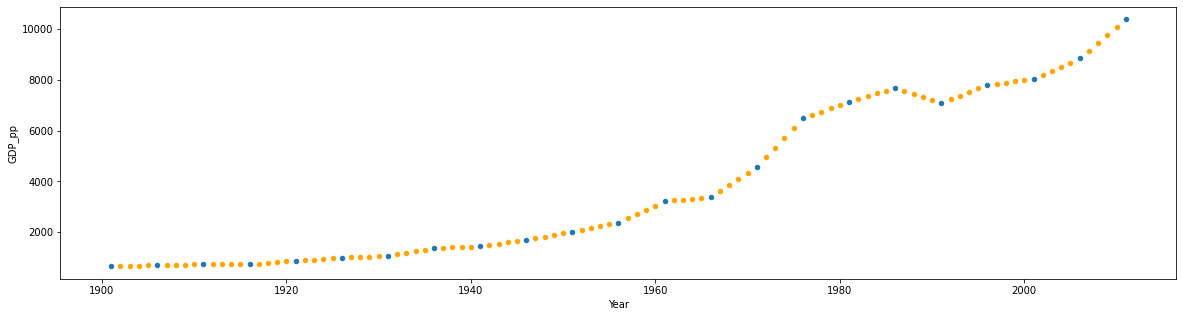

In [11]:
fig, ax = plt.subplots (figsize = (20,5))
country = 'Brazil'
df_gdp[(df_gdp['kind'] == 'real') & (df_gdp['Country'] == country)].plot(kind = 'scatter', y = 'GDP_pp', x = 'Year', ax = ax)
df_gdp[(df_gdp['kind'] == 'estimated') & (df_gdp['Country'] == country)].plot(kind = 'scatter', y = 'GDP_pp', x = 'Year', ax = ax, color = 'orange')